## Comparing Breadth First and Depth First Graph traversals

Traversal is a posh word for visiting all the accessible vertices of a graph. In the real world the order of visits is used as a strategy for searching for items. 

Graphs can be most simply described by giving each node a number and then keeping track of the nodes connected to each node. One way to do this is to make a list for each node of the adjacent nodes - its adjacency list. Then the graph can be a list of these lists where the index for each adjacency list corresponds to the number of the node it belongs to. 

Letters for each node can be labels to help see the structure.

For two nodes a (node 0) and b (node 1) connected in an undirected graph, 1 ('b') has to occur in 0's adjacency list. And 0 ('a') has to occur in 1's adjacency list. 

In more useful representations the nodes can be tuples with the labels explicitly associated with the numbers. But for the traversals below numbers will do as we are just interested in the order that the nodes are reported.

Here is a simple diagram of an undirected graph with four nodes.

    0 ('a')  1 ('b')
         *--*
         ¦  ¦
         *--*
    2 ('c')  3 ('d')
    
Here is a function that defines a list of the adjacency lists for this graph.

In [11]:
def supply_square_graph():
    """ returns a list of adjacency lists for a square graph """
    a, b, c, d = range(4)
    return [[b, c],  # a (0th)
            [a, d],  # b (1st)
            [a, d],  # c (2nd)
            [c, b],  # d (3rd)
           ]
square_graph = supply_square_graph()
print('square_graph', square_graph)

square_graph [[1, 2], [0, 3], [0, 3], [2, 1]]


Now modify the code below to give an additional diagonal edge from node 0 ('a') to node 3 ('d')?

In [69]:
def supply_diagonal_graph():
    """ returns a list of adjacency lists for a square graph with a diagonal join """
    a, b, c, d = range(4)
    return [[b, c],  # a (needs modifying)
            [a, d],  # b )
            [a, d],  # c 
            [c, b],  # d (needs modifying)
           ]
diagonal_graph = supply_diagonal_graph()
print('diagonal graph', diagonal_graph)

diagonal graph [[1, 2], [0, 3], [0, 3], [2, 1]]


In [70]:
# remove this cell from notebook the answer!
def supply_diagonal_graph():
    """ returns a list of adjacency lists for a square graph with a diagonal join """
    a, b, c, d = range(4)
    return [[b, c, d],  # a (needs modifying)
            [a, d],  # b )
            [a, d],  # c 
            [c, b, a],  # d (needs modifying)
           ]
diagonal_graph = supply_diagonal_graph()
print('diagonal graph', diagonal_graph)

diagonal graph [[1, 2, 3], [0, 3], [0, 3], [2, 1, 0]]


Remember that, in this representation of an undirected graph, the adjacency list needs *two* new adjacency values even though only one new edge is added. The function creates the values from the labels you add.

Now here is a function to make the adjacency list for a slightly bigger undirected graph. 

In [77]:
def supply_new_graph():
    """ returns an unknown graph adajency lists"""
    a, b, c, d, e, f = range(6)
    return [[b, c],                # a
            [a, c, d],             # b
            [a, b, e],             # c
            [b, e, f],             # d
            [c, d, f],             # e
            [d, e],                # f
           ]
new_graph = supply_new_graph()

Now on a piece of paper draw a diagram of the `new_graph` labelling the nodes. *Hint* it is best to place nodes `b` `c` `d` `e` as a square. Draw lines joining the nodes from the ajacency lists. Should nodes be joined by lines or arrows, given this is an **undirected** graph?


## Breadth First Traversal

But a breadth first traversal of the graph is also good way to map out the connections. 

The version below is adapted from *Python Algorithms* by Magnus Hetland. It uses a deque to function as a FIFO queue to store the nodes to be visited. 

The traversal starts from one node considered the parent and finds all the connected 'child' nodes. It makes sense to start with node `0` as first parent.

In the breadth_first example the parent:child edges followed are collected as dictionary entries.

In [75]:
from collections import deque
def breadth_first(graph, first_node):
    """ returns a dictionary showing the parents for each node """
    parents = {first_node: None}
    fifo_queue = deque([first_node])
    while fifo_queue:
        next_node = fifo_queue.popleft()
        for child in graph[next_node]:
            if child not in parents: # Already has parent
                parents[child] = next_node  # reached from next_node so next node is its parent
                fifo_queue.append(child)
    return parents

Running `breadth_first` on `diagonal_graph` produces: 

In [76]:
# run this cell to run breadth_first on diagonal_graph and print result
dg_parents = breadth_first(diagonal_graph, 0)
print(f'diagonal_graph breadth_first parents: {dg_parents}')
print(f'order nodes visited: {dg_parents.keys()}')

diagonal_graph breadth_first parents: {0: None, 1: 0, 2: 0, 3: 0}
order nodes visited: dict_keys([0, 1, 2, 3])


We can add arrows showing the order the nodes are visited on diagram of the graph:

<img src=https://aru-bioinf-ibds.github.io./images/cma_tw3_diagonal_graph_breadth_first.JPG width=500>

Below add Python to run the `breadth_first` function to print the dictionary that gives you the parent child connections for the `new_graph` graph and the order the nodes are visited.

Note that focussing on the **keys** of the shows how the algorithm has moved through the graph. Add coloured arrows to you

In [80]:
# write Python to run breadth_first on new_graph and print the order the nodes are visited

Now on your paper diagram add coloured arrows showing how the breath_first traversal visits the `new_graph` graph's nodes (following the example above).

## Depth First Traversal

Another strategy for traversal is called *depth first*. In this case the list of nodes to visit is stored using a stack. In Python a list is an efficient way to implement a stack.

The visited nodes are kept here as a set to make sure they are unique. 

In [16]:
def depth_first(G, s):
    S, Q = set(), []                            # Visited-set and queue
    Q.append(s)                                 # We plan on visiting s
    while Q:                                    # Planned nodes left?
        u = Q.pop()                             # Get one
        if u in S: continue                     # Already visited? Skip it
        S.add(u)                                # We've visited it now
        Q.extend(G[u])                          # Schedule all neighbors
        yield u                                 # Report u as visited

In [61]:
def depth_first_rewrite(graph, first_node):
    """ 
    traverses the graph from the first node using a depth first strategy 
    returning a list of the nodes visited 
    """
    visited = []
    stack = []
    stack.append(first_node)
    while stack:
        next_node = stack.pop()
        if next_node not in visited:
            visited.append(next_node)
            stack.extend(graph[next_node])
    return visited

The yield statement means the function yields values one at a time so to collect a list of the steps through the graph the function is called to populate a list.

Look at the list from the previous graph.

In [62]:
list(depth_first(new_graph,0))

[0, 2, 4, 5, 3, 1]

In [63]:
depth_first_rewrite(new_graph,0)

[0, 2, 4, 5, 3, 1]

In [64]:
breadth_first_rewrite(new_graph,0,breadth=False)

{0: None, 1: 0, 2: 0, 4: 2, 3: 4, 5: 4}

Looking at the list shows how the depth first paradoxically can loop back around to nodes that by eye seem to be 'shallower' in the graph. 

Mark the depth-first route through your diagram in a different colour.

The route loops back to nodes with lower indices because it can thread back 'up' the undirected graph. 'Reversing out' is not part of the strategy. 

A 'reverse out' is forced on the algorithm when there is a 'dead end'. 

To engineer such a 'dead end', the graph can be 'pruned' a bit.

For example, you can remove all d to e and d to f links. And then re-make the depth-first list.

Modify the graph below and then re-run the depth first function.

In [49]:
def supply_trimmed_graph():
    a, b, c, d, e, f = range(6)
    return [[b, c],                # a
            [a, c, d],             # b
            [a, b, e],             # c
            [b, e, f],             # d (trim this list)
            [c, d, f],             # e (trim this list)
            [d, e],                # f (trim this list)
           ]
trimmed_graph = supply_trimmed_graph()

In [50]:
def supply_trimmed_graph():
    a, b, c, d, e, f = range(6)
    return [[b, c],                # a
            [a, c, d],             # b
            [a, b, e],             # c
            [b],             # d (trim this list)
            [c, f],             # e (trim this list)
            [e],                # f (trim this list)
           ]
trimmed_graph = supply_trimmed_graph()

In [51]:
list(depth_first(trimmed_graph,0))

[0, 2, 4, 5, 1, 3]

Make a diagram of the new graph and the new depth-first traversal 

Reference:
Magnus Hetland (2014) *Python Algorithms* Chapter 2 and Chapter 5.

# drawing graphs

In [67]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_lowercase
%matplotlib inline
def draw_graph(graph_list):
    nx_graph  = nx.Graph()
    labels = {}
    for count, letter in enumerate(ascii_lowercase[:len(graph_list)]):
        nx_graph.add_node(count)
        labels[count] = f'{letter} {count}'
    for count, edges in enumerate(graph_list):
        for edge in edges:
            nx_graph.add_edge(count, edge)
    # print('nodes', nx_graph.nodes)
    # print('edges', nx_graph.edges)
    nx.draw(nx_graph, with_labels=True, labels=labels)
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


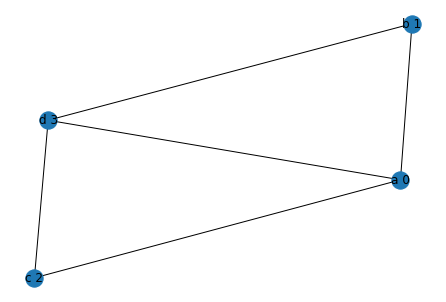

In [68]:
draw_graph(diagonal_graph)

In [ ]:
draw_graph(new_graph)

nodes [0, 1, 2, 3, 4, 5]
edges [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (4, 5)]


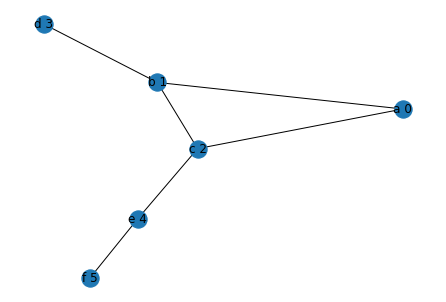

In [60]:
draw_graph(trimmed_graph)